In [47]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt

In [48]:
EXTRACTED_FEATURES_DB_NAME = '/data/experiments/YUPS-R/extracted-features/extracted-features.sqlite'

In [49]:
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
sequences_df = pd.read_sql_query("select sequence,charge,run_name,human,classed_as from features", db_conn)
db_conn.close()

In [50]:
sequences_df.classed_as.unique()

array(['decoy', 'target'], dtype=object)

In [51]:
sequences_df['group'] = sequences_df.run_name.apply(lambda x: x.split('_')[0])

In [52]:
sequences_df.columns

Index(['sequence', 'charge', 'run_name', 'human', 'classed_as', 'group'], dtype='object')

In [53]:
sequences_df[['sequence','charge','run_name','human','group','classed_as']].sample(n=5)

,sequence,charge,run_name,human,group,classed_as
185721,AYLEDFYNFVTEEIPEPAK,2,YeastPlusUPS2_09_Slot1-1_1_3658,0,YeastPlusUPS2,target
176246,KLDESFEPVR,2,YeastPlusUPS2_03_Slot1-1_1_3650,0,YeastPlusUPS2,target
285164,LPLTDEQTAEGR,2,YeastPlusUPS1_01_Slot1-1_1_3663,0,YeastPlusUPS1,target
260383,VNEQETSAQEQEEETAEPSEENEDR,2,YeastPlusUPS1_06_Slot1-1_1_3668,0,YeastPlusUPS1,target
147573,M[15.9949]LQDNNGPAVK,2,YeastPlusUPS1_08_Slot1-1_1_3670,0,YeastPlusUPS1,target


#### analyse the UPS1 runs

In [54]:
ups1_only_df = sequences_df[(sequences_df.group == 'YeastPlusUPS1')]
ups1_only_targets_df = ups1_only_df[(ups1_only_df.classed_as == 'target')]

In [55]:
number_of_ups1_runs_in_experiment = len(ups1_only_df.run_name.unique())
print('there are {} UPS1 runs in the experiment'.format(number_of_ups1_runs_in_experiment))

there are 10 UPS1 runs in the experiment


In [56]:
# count how many runs each sequence/charge was extracted from and classified as a target
sequence_occurences_l = []
for group_name,group_df in ups1_only_targets_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name, len(group_df.run_name.unique()), group_name[0], group_name[1]))
ups1_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence_charge','number_of_runs_targets_extracted','sequence','charge'])

In [57]:
# display the number of missing values across the experiment
ups1_sequence_occurences_df['missing_files'] = number_of_ups1_runs_in_experiment - ups1_sequence_occurences_df.number_of_runs_targets_extracted
proportion_of_missing_values = ups1_sequence_occurences_df.missing_files.sum() / (len(ups1_sequence_occurences_df) * number_of_ups1_runs_in_experiment)
print("{}% of values are missing across the UPS1-only runs.".format(round(proportion_of_missing_values*100)))

9.0% of values are missing across the UPS1-only runs.


In [58]:
ups1_sequence_occurences_df.sample(n=10)[['sequence','charge','number_of_runs_targets_extracted','missing_files']]

,sequence,charge,number_of_runs_targets_extracted,missing_files
5527,IDSHVVLSFSGLNADSR,3,10,0
4717,GYGQYGPTMSVEEFLDKEFEEGR,3,10,0
3727,FSEGDVVCALCGLVLSDK,2,10,0
7885,LM[15.9949]TATISADGGGPSEIDPK,2,10,0
7292,LEDDLESDLLEDIIK,2,10,0
11338,SKDDAVIDVNDLR,2,10,0
11288,SILSNDEILNSQAPEELASFNQDWMK,3,10,0
3240,EYTELEDKVDTIK,2,10,0
9784,QDSLTQLK,2,10,0
2231,EDQAPDEDEEGPPPAMPARPTATTETTDATAAAVR,3,10,0


In [59]:
len(ups1_only_df[ups1_only_df.classed_as == 'decoy']) / len(ups1_only_df)

0.11643079002430244

In [60]:
unique_sequences_ups1_df = ups1_only_targets_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=False)
number_of_unique_sequences_ups1 = len(unique_sequences_ups1_df)
number_of_unique_sequences_ups1

14955

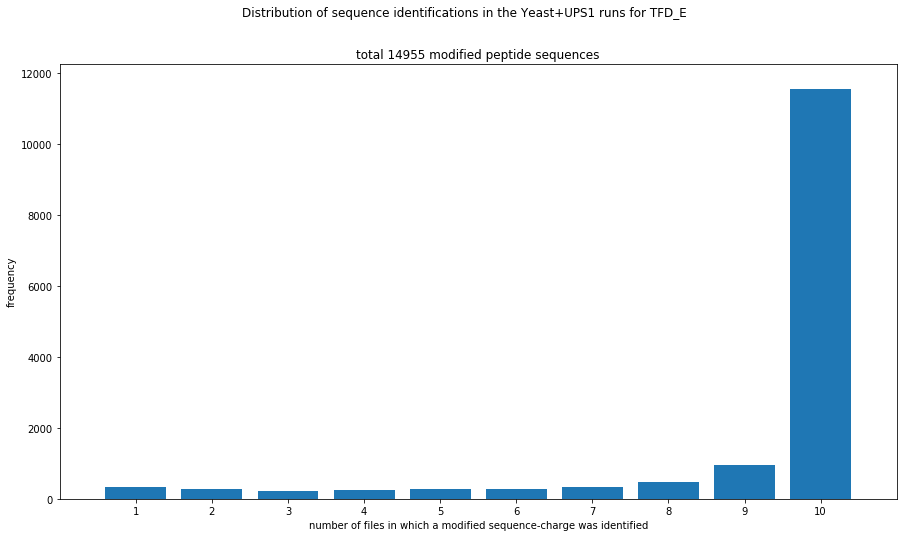

In [61]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications in the Yeast+UPS1 runs for TFD_E')
plt.title('total {} modified peptide sequences'.format(number_of_unique_sequences_ups1))

counts = np.bincount(ups1_sequence_occurences_df.number_of_runs_targets_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
# plt.ylim((0,20000))

plt.show()

#### now analyse the UPS2 runs

In [62]:
ups2_only_df = sequences_df[(sequences_df.group == 'YeastPlusUPS2')]
ups2_only_targets_df = ups2_only_df[(ups2_only_df.classed_as == 'target')]

In [63]:
number_of_ups2_runs_in_experiment = len(ups1_only_df.run_name.unique())
print('there are {} UPS2 runs in the experiment'.format(number_of_ups2_runs_in_experiment))

there are 10 UPS2 runs in the experiment


In [64]:
# count how many runs each sequence/charge was extracted from and classified as a target
sequence_occurences_l = []
for group_name,group_df in ups2_only_targets_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name, len(group_df.run_name.unique()), group_name[0], group_name[1]))
ups2_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence_charge','number_of_runs_targets_extracted','sequence','charge'])

In [65]:
# display the number of missing values across the experiment
ups2_sequence_occurences_df['missing_files'] = number_of_ups2_runs_in_experiment - ups2_sequence_occurences_df.number_of_runs_targets_extracted
proportion_of_missing_values = ups2_sequence_occurences_df.missing_files.sum() / (len(ups2_sequence_occurences_df) * number_of_ups2_runs_in_experiment)
print("{}% of values are missing across the UPS2-only runs.".format(round(proportion_of_missing_values*100)))

10.0% of values are missing across the UPS2-only runs.


In [66]:
ups2_sequence_occurences_df.sample(n=10)[['sequence','charge','number_of_runs_targets_extracted','missing_files']]

,sequence,charge,number_of_runs_targets_extracted,missing_files
6074,IPVLGHADGICSIYLDEDADLIK,3,10,0
14459,YGPLLVDIIDPAK,2,10,0
11399,SLHTLFGDK,2,10,0
4083,GGNEPLTEWFK,2,10,0
9806,QGAGSATLSM[15.9949]AFAGAK,2,10,0
8163,LSEENKQQSGTMHIDTSPSVVSDIISSR,3,10,0
9142,NISIHPLNEGLIVDAGFLKPLVR,3,10,0
1035,CGGIDKR,2,10,0
5616,IFEVEGETHK,2,9,1
11595,SPLGGIFSDIEHNHCVEK,2,10,0


In [67]:
len(ups2_only_df[ups2_only_df.classed_as == 'decoy']) / len(ups2_only_df)

0.12734377031701039

In [68]:
unique_sequences_ups2_df = ups2_only_targets_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=False)
number_of_unique_sequences_ups2 = len(unique_sequences_ups2_df)
number_of_unique_sequences_ups2

14903

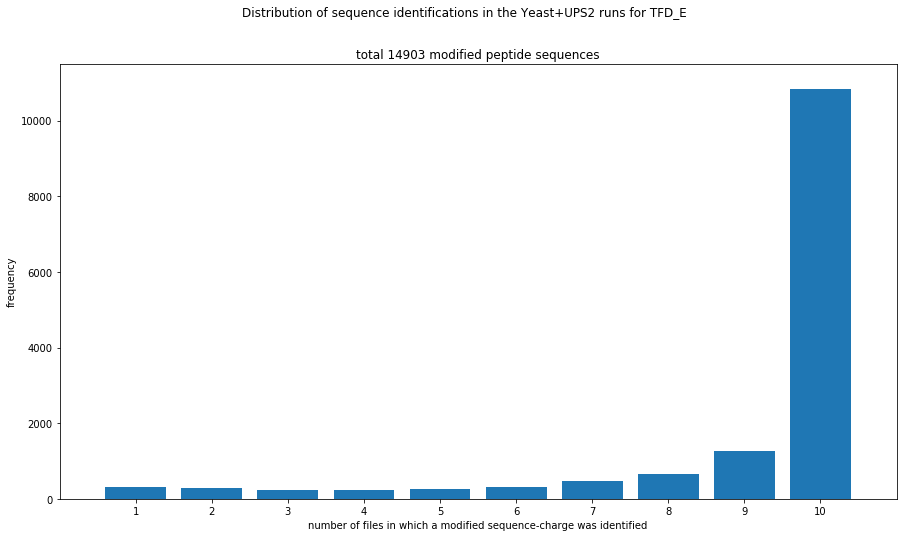

In [69]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications in the Yeast+UPS2 runs for TFD_E')
plt.title('total {} modified peptide sequences'.format(number_of_unique_sequences_ups2))

counts = np.bincount(ups2_sequence_occurences_df.number_of_runs_targets_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
# plt.ylim((0,20000))

plt.show()